# Project 1, Part 3, Executive Questions: Product Specific Questions

University of California, Berkeley
Master of Information and Data Science (MIDS) program
w205 - Fundamentals of Data Engineering

Student: Stephanie Cabanela

Year: 2022

Semester: Spring

Section: 7


# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [2]:
# Source for this cell: Lab 2

#
# function to run a select query and return rows in a pandas dataframe
# pandas puts all numeric values from postgres to float
# if it will fit in an integer, change it to integer
#

def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)

# Connect to Postgres database
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

# Create a cursor for the connection
cursor = connection.cursor()

# Instructions for Specific Questions

For each specific quesion, you must write 1 and only 1 query that answers that specific question.  The results of your query must be displayed in a Pandas dataframe as demonstrated in the labs

All output should be sorted.

For store name, use the city name the store is located in.

When sorting by store name, sort in alphabetical order.

For meal name, use the product description.

When sorting by meal name, sort in alphabetical order.

For month, use the full month name: January, February, March, etc.

When sorting by month, sort in calendar order: January, February, March, etc.  You may find it useful to include a month number to help with the sort.  It's ok to leave it in the output.

For day of week, use the full day of week name: Sunday, Monday, Tuesday, etc.

When sorting by day of week, sort in day of week order: Sunday, Monday, Tuesday, etc. You may find it usefule to include a day of week number to help with the sort.  It's ok to leave it in the output.


# 1.3.1 How many meals were purchased for all of AGM?

In [3]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sum(quantity) as total_meals_purchased
from line_items

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_meals_purchased
0,8228284


# 1.3.2 How many meals were purchased for all of AGM by meal?

Sort by meal name in alphabetical order

In [4]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select pd.description as meal_name, sum(li.quantity) as total_meals_purchased
from line_items as li
    join products as pd on li.product_id = pd.product_id
group by pd.description
order by pd.description

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,meal_name,total_meals_purchased
0,Brocolli Stir Fry,913984
1,Chicken Salad,228561
2,Curry Chicken,1368884
3,Eggplant Lasagna,1599058
4,Pistachio Salmon,1828778
5,Spinach Orzo,456769
6,Teriyaki Chicken,1145013
7,Tilapia Piccata,687237


# 1.3.3 How many meals were purchased by store and by meal?

Sort by store name in alphabetical order, then by meal name in alphabetical order

In [5]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select st.city as store_name, 
    pd.description as meal_name, 
    sum(li.quantity) as total_meals_purchased
from stores as st
    join sales as sa on st.store_id = sa.store_id
    join line_items as li on sa.store_id = li.store_id and sa.sale_id = li.sale_id
    join products as pd on li.product_id = pd.product_id
group by store_name, meal_name
order by store_name, meal_name

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store_name,meal_name,total_meals_purchased
0,Berkeley,Brocolli Stir Fry,232038
1,Berkeley,Chicken Salad,57719
2,Berkeley,Curry Chicken,346508
3,Berkeley,Eggplant Lasagna,405637
4,Berkeley,Pistachio Salmon,464274
5,Berkeley,Spinach Orzo,115469
6,Berkeley,Teriyaki Chicken,290858
7,Berkeley,Tilapia Piccata,174252
8,Dallas,Brocolli Stir Fry,179885
9,Dallas,Chicken Salad,44756


# 1.3.4 How many meals were purchased by month?

Sort by month in calendar order

In [6]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select extract(month from sa.sale_date) as month_number, 
    to_char(sa.sale_date, 'Month') as month_name,
    sum(li.quantity) as total_meals_purchased
from sales as sa
    join line_items as li on sa.store_id = li.store_id and sa.sale_id = li.sale_id
group by month_number, month_name
order by month_number

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,month_number,month_name,total_meals_purchased
0,1,January,650319
1,2,February,631190
2,3,March,731635
3,4,April,687607
4,5,May,664820
5,6,June,677009
6,7,July,666087
7,8,August,752484
8,9,September,631580
9,10,October,741259


# 1.3.5 How many meals were purchased by month and meal?

Sort by month in calendar order, then by meal name in alphabetical order

In [7]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select extract(month from sa.sale_date) as month_number, 
    to_char(sa.sale_date, 'Month') as month_name,
    pd.description as meal_name,
    sum(li.quantity) as total_meals_purchased
from sales as sa
    join line_items as li on sa.store_id = li.store_id and sa.sale_id = li.sale_id
    join products as pd on li.product_id = pd.product_id
group by month_number, month_name, meal_name
order by month_number, meal_name

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,month_number,month_name,meal_name,total_meals_purchased
0,1,January,Brocolli Stir Fry,72161
1,1,January,Chicken Salad,18003
2,1,January,Curry Chicken,108134
3,1,January,Eggplant Lasagna,126605
4,1,January,Pistachio Salmon,144053
...,...,...,...,...
91,12,December,Eggplant Lasagna,134666
92,12,December,Pistachio Salmon,154242
93,12,December,Spinach Orzo,38297
94,12,December,Teriyaki Chicken,96896


# 1.3.6 How many meals were purchased by day of week and meal?

Sort by day of week in day of week order, then by meal name in alphabetical order

In [8]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select extract(dow from sa.sale_date) as day_number, 
    to_char(sa.sale_date, 'Day') as day_name,
    pd.description as meal_name,
    sum(li.quantity) as total_meals_purchased
from sales as sa
    join line_items as li on sa.store_id = li.store_id and sa.sale_id = li.sale_id
    join products as pd on li.product_id = pd.product_id
group by day_number, day_name, meal_name
order by day_number, meal_name

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,day_number,day_name,meal_name,total_meals_purchased
0,0,Sunday,Brocolli Stir Fry,172250
1,0,Sunday,Chicken Salad,43110
2,0,Sunday,Curry Chicken,257216
3,0,Sunday,Eggplant Lasagna,301726
4,0,Sunday,Pistachio Salmon,344315
5,0,Sunday,Spinach Orzo,85968
6,0,Sunday,Teriyaki Chicken,215741
7,0,Sunday,Tilapia Piccata,128763
8,1,Monday,Brocolli Stir Fry,121717
9,1,Monday,Chicken Salad,30790


# 1.3.7 Average number of meals per sale for all of AGM


In [9]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select avg(num_meals) as avg_num_meals_per_sale
from (select store_id, sale_id, sum(quantity) as num_meals
        from line_items
        group by store_id, sale_id) as meals_per_sale

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,avg_num_meals_per_sale
0,5.351322


# 1.3.8 Average number of meals per sale by store

Sort by store name in alphabetical order


In [10]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select st.city as store_name, avg(temp.num_meals) as avg_num_meals_per_sale
from (select store_id, sale_id, sum(quantity) as num_meals
    from line_items
    group by store_id, sale_id) as temp
    join stores as st on temp.store_id = st.store_id
group by st.city
order by st.city

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store_name,avg_num_meals_per_sale
0,Berkeley,5.345514
1,Dallas,5.353353
2,Miami,5.359892
3,Nashville,5.332978
4,Seattle,5.361470


# 1.3.9 The Executives have also asked you to provide your best example of a data visualization for one of the above queries

You may choose any one of the above queries. 

It's best to select the one that you think will provide the most interesting data visualization.  

You are allowed to add a pivot as demonstrated in the labs if it is needed for your data visualization. 

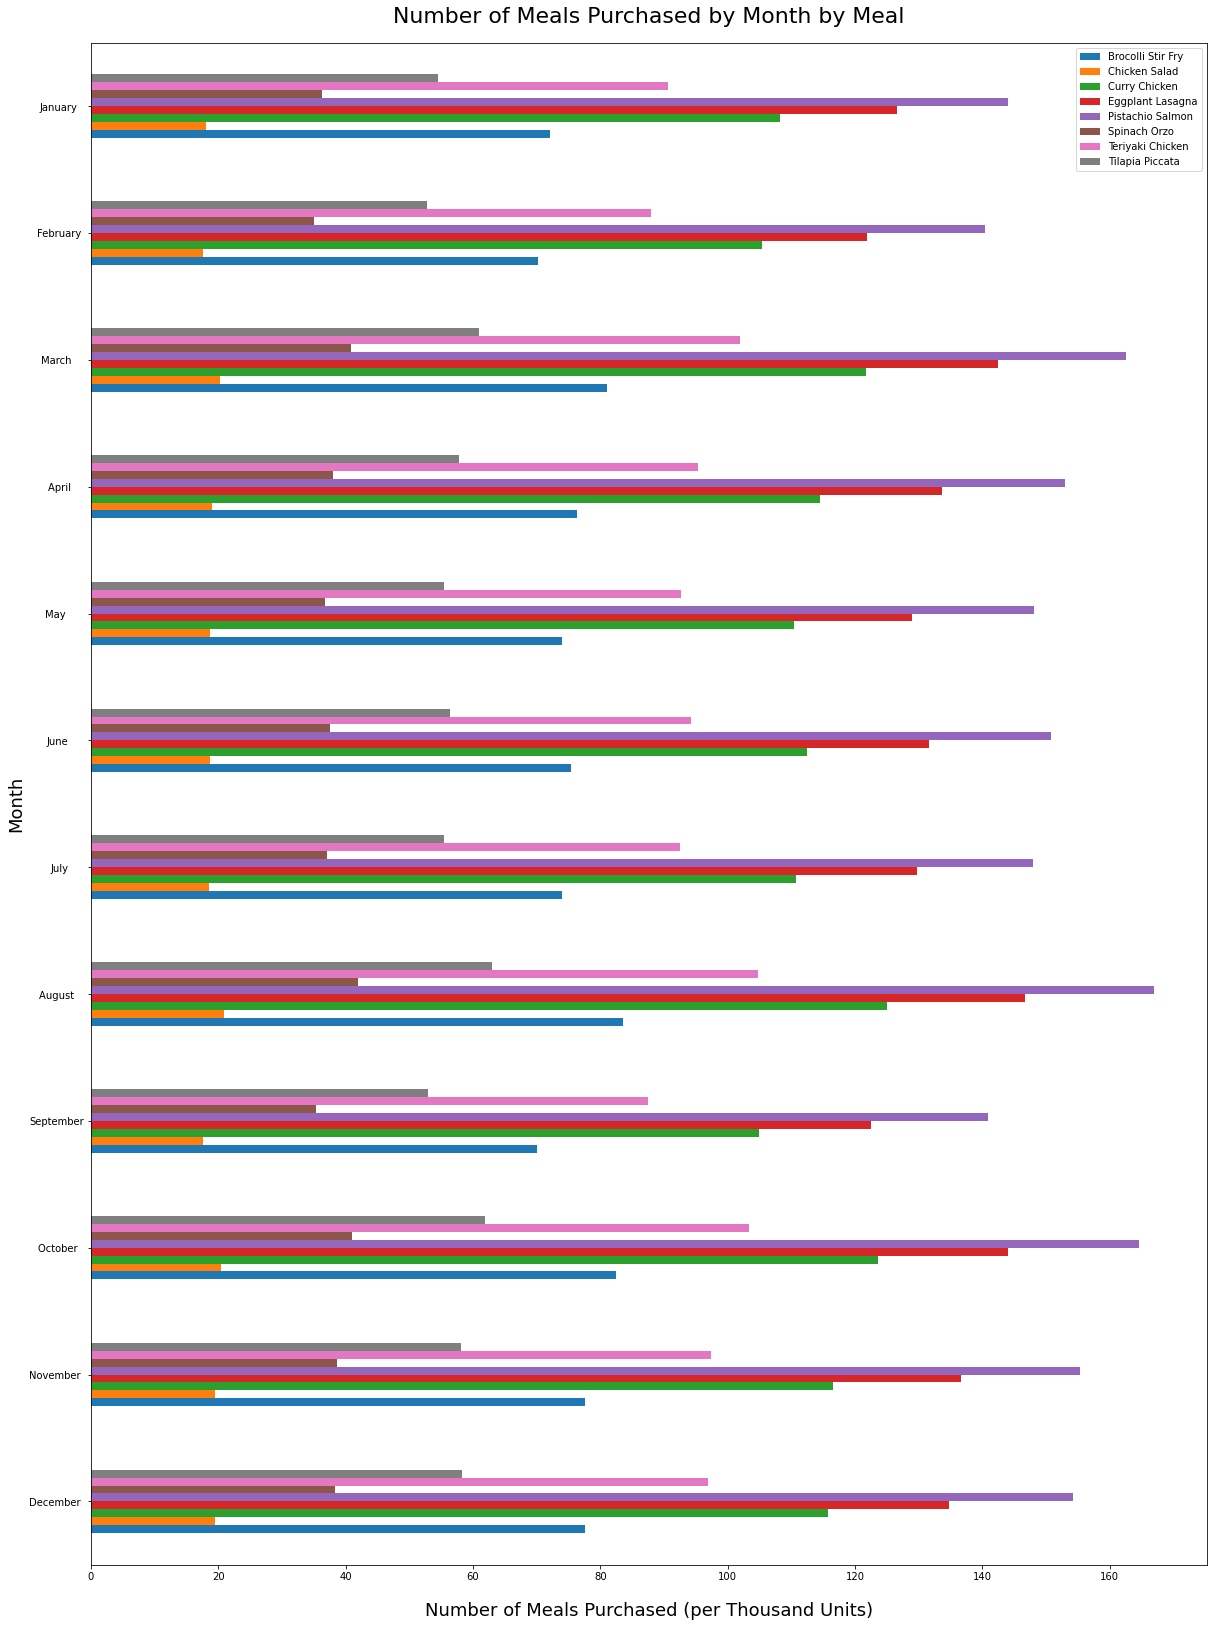

In [11]:
# Prepare data for visualization using pivot

rollback_before_flag = True
rollback_after_flag = True

query = """

select *
from crosstab (
    '
        select month_name, meal_name, total_meals_purchased
        from
            (
            select extract(month from sa.sale_date) as month_number, 
                to_char(sa.sale_date, ''Month'') as month_name,
                pd.description as meal_name,
                sum(li.quantity)/1000 as total_meals_purchased
            from sales as sa
                join line_items as li on sa.store_id = li.store_id and sa.sale_id = li.sale_id
                join products as pd on li.product_id = pd.product_id
            group by month_number, month_name, meal_name
            order by month_number desc, meal_name
            ) as temp
    ')
as ("month_name" text,
    "Brocolli Stir Fry" numeric,
    "Chicken Salad" numeric,
    "Curry Chicken" numeric,
    "Eggplant Lasagna" numeric,
    "Pistachio Salmon" numeric,
    "Spinach Orzo" numeric,
    "Teriyaki Chicken" numeric,
    "Tilapia Piccata" numeric)

"""

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

# What's interesting about this graph: We can visually see which meals are doing better for each month.
# This graph might help us answer questions like: do seasonal ingredients in meals impact sales?

df.plot.barh(figsize=(20,28))
plt.rcParams.update({'font.size':16})
plt.title('Number of Meals Purchased by Month by Meal', fontsize=22, pad=20)
plt.ylabel('Month', fontsize=18)
plt.xlabel('Number of Meals Purchased (per Thousand Units)', fontsize=18, labelpad=20)
plt.yticks(np.arange(12), labels=df['month_name'])
plt.show()